# Multiple Linear Regression 

While simple linear regression has only one independent variable ( also called feature, predictor) and fits in equation y=b0+b1X, multiple linear regression (MLR) has more than one independent variable and fits in equation y=b0+b1X1+b2X2+b3X3….bnXn


### When you have more than one independent variable to work on you need to understand a few dynamics

> Are these variables related to each other? It’s called multicollinearity. Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.

> Which independent variable has higher impact on dependent variable and what is nature of impact?

> Are all the variables numeric or some are categorical?

>What is the nature of categorical variable?

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
df = pd.read_csv("C:/Users/arun_r2/Desktop/Board_Infinity/Python/Raw_File_main/auto-mpg.csv")

In [41]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Data Exploration

In [42]:
df.shape

(398, 9)

In [43]:
df.applymap(np.isreal) 
# here we can see horse power is shown as a not real number, even when it is numeric. We need to clean this column

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,True,True,True,False,True,True,True,True,False
1,True,True,True,False,True,True,True,True,False
2,True,True,True,False,True,True,True,True,False
3,True,True,True,False,True,True,True,True,False
4,True,True,True,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...
393,True,True,True,False,True,True,True,True,False
394,True,True,True,False,True,True,True,True,False
395,True,True,True,False,True,True,True,True,False
396,True,True,True,False,True,True,True,True,False


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [45]:
dff = (df[df.horsepower =='?'].index) # checking if horse power column is having ? values
dff 

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [46]:
df = df.drop(df[df.horsepower =='?'].index)
df.shape

(392, 9)

In [47]:
df.info() # still it shows as object . Lets do typecasting now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [48]:
df['horsepower']=pd.to_numeric(df['horsepower'])

In [11]:
df.info() # now it is shwoing as numeric

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [49]:
df.applymap(np.isreal) # we can see now only car name is false 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,True,True,True,True,True,True,True,True,False
1,True,True,True,True,True,True,True,True,False
2,True,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...
393,True,True,True,True,True,True,True,True,False
394,True,True,True,True,True,True,True,True,False
395,True,True,True,True,True,True,True,True,False
396,True,True,True,True,True,True,True,True,False


In [50]:
# Check if there exists any null observations
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [51]:
df1 = df._get_numeric_data()
X=df1.drop(['mpg','origin'], axis=1) # we can ignore mpg because it is our target variable and origin is not required
# X=df1
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,116.0,cylinders
1,86.5,displacement
2,60.3,horsepower
3,137.5,weight
4,69.4,acceleration
5,109.3,model year


#### VIF Factor above 10 indicates multicollinearity. cyclinders has highesht VIF factor. Let’s remove these features from X array and calculate the VIF again.

In [52]:
X=df1.drop(['mpg','origin','weight','cylinders','model year','displacement'], axis=1)
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,4.5,horsepower
1,4.5,acceleration


In [53]:
X=df1.drop(['mpg','origin','weight','cylinders','model year','displacement'], axis=1)
X

# lets assign X 

,horsepower,acceleration
0,130,12.0
1,165,11.5
2,150,11.0
3,150,12.0
4,140,10.5
...,...,...
393,86,15.6
394,52,24.6
395,84,11.6
396,79,18.6


In [54]:
y=df['mpg']

C:\Users\arun_r2\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


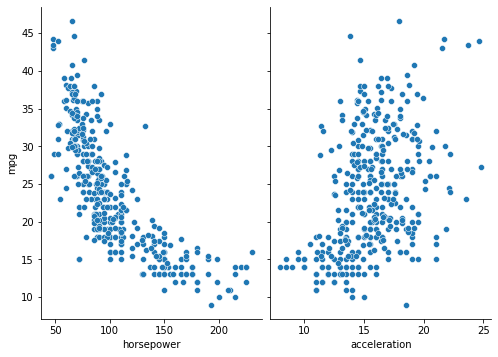

In [56]:
sns.pairplot(df,x_vars=['horsepower','acceleration'],y_vars='mpg',size=5,aspect=0.7)
plt.show()

In [31]:
import statsmodels.api as sm
X=sm.add_constant(X)
regressorOLS = sm.OLS(y, X).fit()
regressorOLS.summary()

C:\Users\arun_r2\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     358.9
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           4.74e-89
Time:                        21:52:00   Log-Likelihood:                -1156.2
No. Observations:                 392   AIC:                             2318.
Df Residuals:                     389   BIC:                             2330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           36.1882      1.922     18.828      0.000      32.409      39.967
displacement    -0.0609      0.003    -22.791      0.000      -0.066      -0.056
acceleration    -0.0582      0.101     -0.575      0.566      -0.257       0.141
==============================================================================
Omnibus:                       43.926   Durbin-Watson:                   0.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.179
Skew:                           0.725   Prob(JB):                     1.57e-15
Kurtosis:                       4.440   Cond. No.                     1.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Observe P>|t| value for acceleration. It is more than 0.05.

In [41]:
Xelm=X.drop(['acceleration'], axis=1)
regressorOLS = sm.OLS(y, Xelm).fit()
regressorOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     718.7
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           1.66e-90
Time:                        17:59:37   Log-Likelihood:                -1156.4
No. Observations:                 392   AIC:                             2317.
Df Residuals:                     390   BIC:                             2325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           35.1206      0.494     71.033      0.000      34.149      36.093
displacement    -0.0601      0.002    -26.808      0.000      -0.064      -0.056
==============================================================================
Omnibus:                       41.308   Durbin-Watson:                   0.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.139
Skew:                           0.709   Prob(JB):                     5.30e-14
Kurtosis:                       4.317   Cond. No.                         466.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

#train the model

from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)

#predict y
y_pred=linear_reg.predict(X_test)

(313, 3) (79, 3) (313,) (79,)


In [33]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head(15)

,Actual,Predicted
146,28.0,29.616941
282,22.3,26.696172
69,12.0,13.997704
378,38.0,28.722973
331,33.8,29.294171
257,19.4,21.176401
310,38.1,29.796082
328,30.0,26.461084
125,20.0,23.195892
108,20.0,29.321885


# It’s pretty close! Let’s review the bar chart.

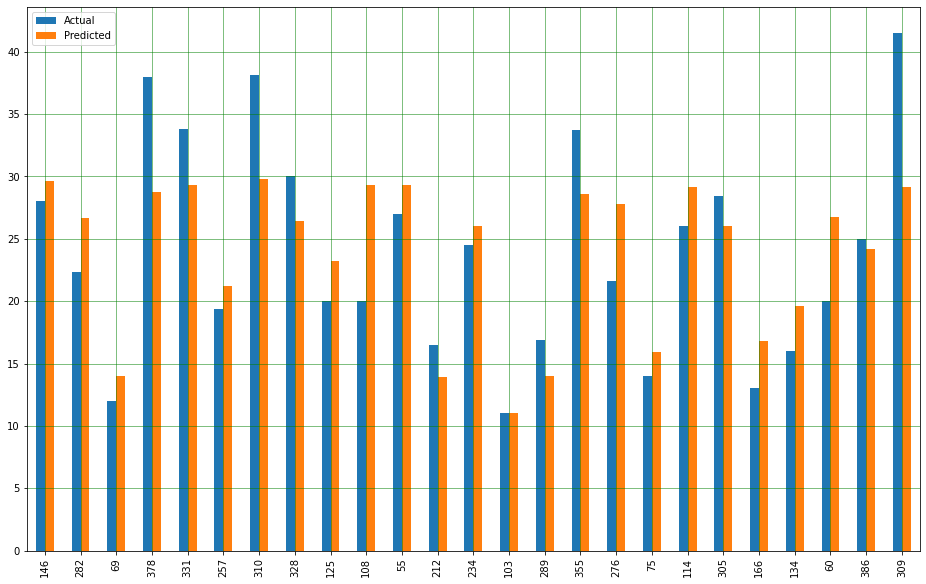

In [34]:
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### You got the most optimal model by fine tuning your features.

# Happy Learning 

In [35]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("R2 Error:", metrics.r2_score(y_test, y_pred))

R2 Error: 0.6776844822150517
